In [11]:
# Basic imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb

# Ignore warnings from seaborn
import warnings

warnings.filterwarnings("ignore")
from pprint import pprint
# import jupyter_black

# jupyter_black.load()

# Importing data

In [12]:
df=pd.read_excel("Flourishing_248_HD - Copy.xlsx")
df.head()

,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
0,344,72,6,2,2,3,82,3,83,4.142857,44
1,317,45,6,2,2,3,81,3,83,4.000000,44
2,444,43,5,1,1,3,79,3,78,5.000000,47
3,270,60,2,2,3,3,79,3,82,4.666667,42
4,52,49,2,2,2,3,77,3,73,2.285714,33


## Checking basic info, missing values , shape and data types

In [13]:
df.shape

(248, 11)

In [14]:
df1=df.copy()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          248 non-null    int64  
 1   age         248 non-null    int64  
 2   education   248 non-null    int64  
 3   sex         248 non-null    int64  
 4   famstatus   248 non-null    int64  
 5   pro_cat     248 non-null    int64  
 6   pro_quant   248 non-null    int64  
 7   priv_cat    248 non-null    int64  
 8   priv_quant  248 non-null    int64  
 9   positivity  248 non-null    float64
 10  flow        248 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 21.4 KB


In [16]:
di_sex = {2: "female", 1: "male"}
df.replace({"sex": di_sex},inplace=True)

di_famstatus = {2: "Separate / Divorced", 1: "Single",3:"Couple"}
df.replace({"famstatus": di_famstatus},inplace=True)

di_education = {2: "completed HS", 1: "not completed HS", 3:"upto 2 years after HS", 4:"upto 3 years after HS", 5:"upto 4 years after HS",6:"upto 5 years after HS" }
df.replace({"education": di_education},inplace=True)

di_pro = {2: "Moderately Mentally Healthy", 1: "Languishing",3:"Flourishing"}
df.replace({"pro_cat": di_pro},inplace=True)

di_priv = {2: "Moderately Mentally Healthy", 1: "Languishing",3:"Flourishing"}
df.replace({"priv_cat": di_priv},inplace=True)
# di_education = {2: "female", 1: "male"}
# df.replace({"sex": di_sex})

df.head()

,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
0,344,72,upto 5 years after HS,female,Separate / Divorced,Flourishing,82,Flourishing,83,4.142857,44
1,317,45,upto 5 years after HS,female,Separate / Divorced,Flourishing,81,Flourishing,83,4.000000,44
2,444,43,upto 4 years after HS,male,Single,Flourishing,79,Flourishing,78,5.000000,47
3,270,60,completed HS,female,Couple,Flourishing,79,Flourishing,82,4.666667,42
4,52,49,completed HS,female,Separate / Divorced,Flourishing,77,Flourishing,73,2.285714,33


# Analysis

## Univariate

In [17]:
numerical_cols=["age","pro_quant","priv_quant","positivity","flow"]
categorical_cols=["education","sex","famstatus","pro_cat","priv_cat"]


### Categorical

In [79]:
def msds_summary_table_full(data):
    if isinstance(data, pd.Series):
        data = data.tolist()
    output = {}
    for i in data:
        output[i] = {'cpt': data.count(i), 'freq': (data.count(i) / len(data)) * 100}
    return output

def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return f"{pct:.1f}%"

def msds_plot_summary_table_pareto(my_dict, m):
    keys = list(my_dict.keys())
    vals = [my_dict[k]['freq'] for k in my_dict]

    # Sort the data
    sorted_data = sorted(zip(keys, vals), key=lambda x: x[1], reverse=True)
    keys_sorted, vals_sorted = zip(*sorted_data)

    colors = ['gray', 'green', 'blue', 'orange', 'purple', 'pink']

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

    # Pareto Chart
    ax1.bar(range(len(keys_sorted)), vals_sorted, color=colors)
    ax1.set_xlabel(f"{m}")
    ax1.set_ylabel("Frequencies", color='blue')
    ax1.set_xticks(range(len(keys_sorted)))
    ax1.set_xticklabels(keys_sorted, rotation=45, ha='right')
    ax1.set_title(f"Pareto Chart for {m}")

    # Pie Chart
    wedges, texts, autotexts = ax2.pie(vals_sorted,
                                       autopct=lambda pct: func(pct, vals_sorted),
                                       labels=keys_sorted,
                                       colors=colors,
                                       startangle=90,
                                       wedgeprops={'linewidth': 1, 'edgecolor': "black"})
    
    ax2.set_title(f"pie chart for {m}")

    # Make the percentage text white and bold
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    plt.tight_layout()
    plt.show()

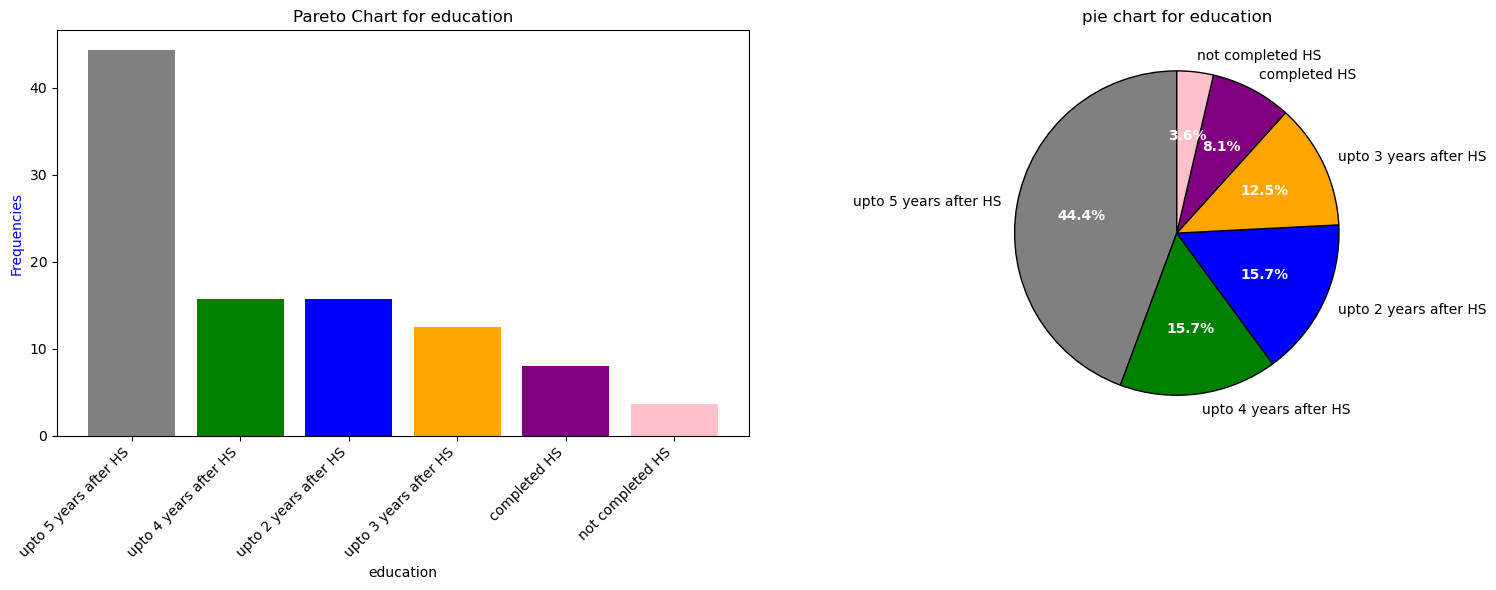

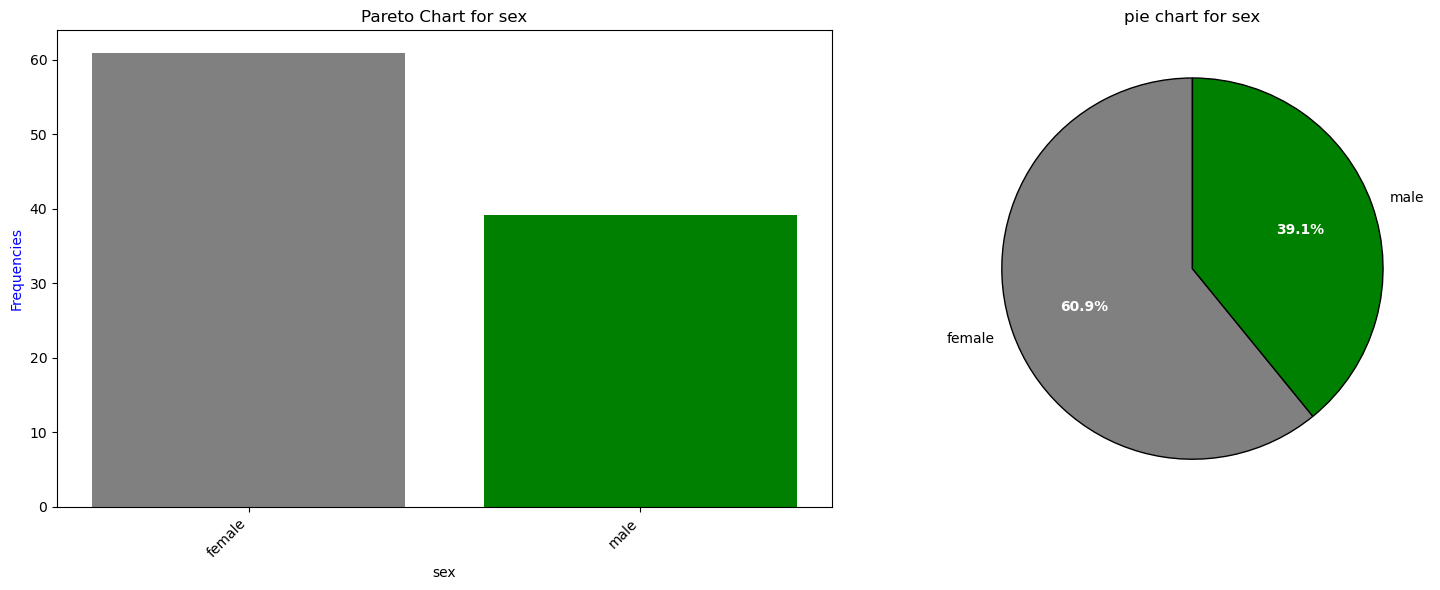

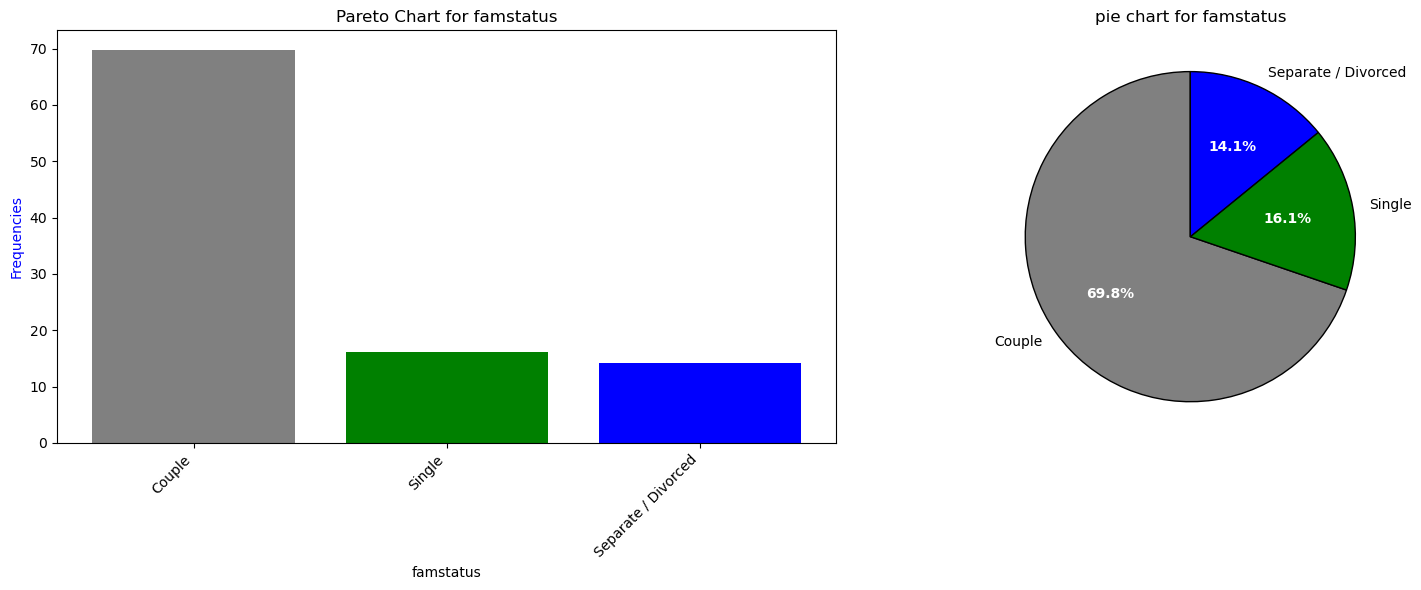

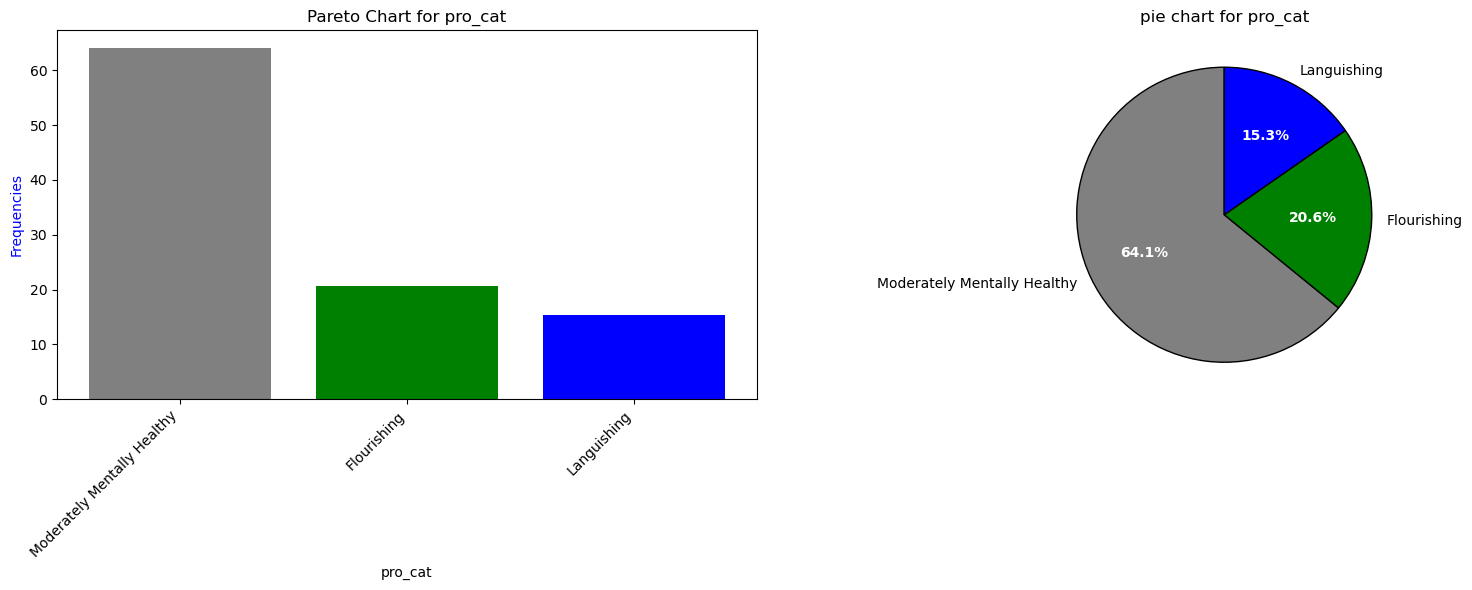

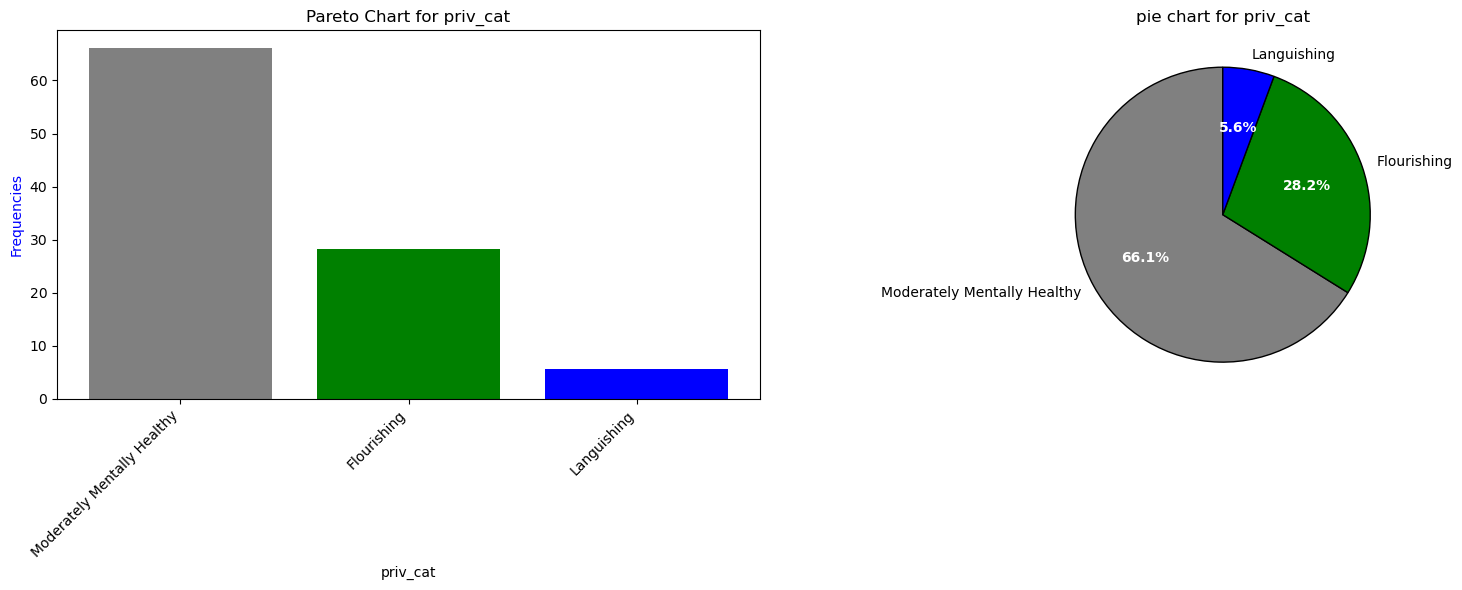

In [80]:
for i in categorical_cols:
    
    summary=msds_summary_table_full(df[i])
    msds_plot_summary_table_pareto(summary,i)
    


### Continous

In [30]:
def msds_cum_histogram(data, N=5):
    data_min = min(data)
    data_max = max(data)
    rg = data_max - data_min
    bin_indices = [
        int(np.floor(N * (x - data_min) / rg))
        for x in data
        if x is not None and not np.isnan(x)
    ]
    n = len(bin_indices)
    bins_width = rg / N
    bins_lower = [data_min + bins_width * (i - 1) for i in range(1, N + 1)]
    bins_mid = [data_min + bins_width * (i - 0.5) for i in range(1, N + 1)]
    bins_upper = [data_min + bins_width * (i) for i in range(1, N + 1)]
    bins_data = np.zeros(N).astype("int32")
    for i in bin_indices:
        bins_data[min(i, N - 1)] += 1
    ds = []
    cum_data = np.cumsum(bins_data)
    for i in range(N):
        ds.append(
            {
                "lower": bins_lower[i],
                "upper": bins_upper[i],
                "mid": bins_mid[i],
                "count": bins_data[i],
                "freq": bins_data[i] / n * 100,
                "cum_freq": cum_data[i] / n * 100,
            }
        )
    return ds




def msds_plot_histogram_pareto(hist_data,m, title=None):
    x = ["{:.0f}".format(a["mid"]) for a in hist_data]
    y = [x["count"] for x in hist_data]
    cum_y = [x["cum_freq"] for x in hist_data]
    yLabel = "Count"

    plt.figure()
    sb.barplot(x=x, y=y, color=sb.color_palette()[0]).set(
        ylabel=yLabel,
        xlabel=title,
    )
    if len(hist_data) > 10:
        plt.xticks(rotation=45)
    ax2 = plt.twinx()
    sb.lineplot(x=x, y=cum_y, marker="o", color=sb.color_palette()[1]).set(
        ylabel="Cummulative freq (percent)"
    )
    plt.title(f"Pareto histogram Chart for {m}")

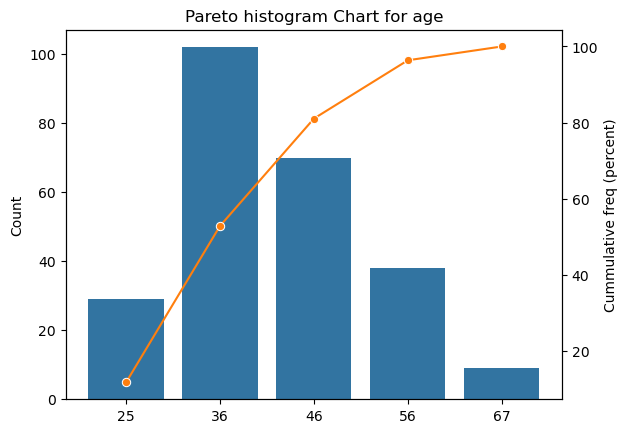

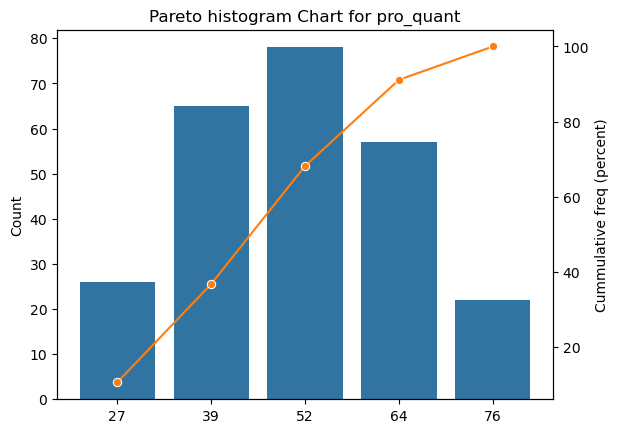

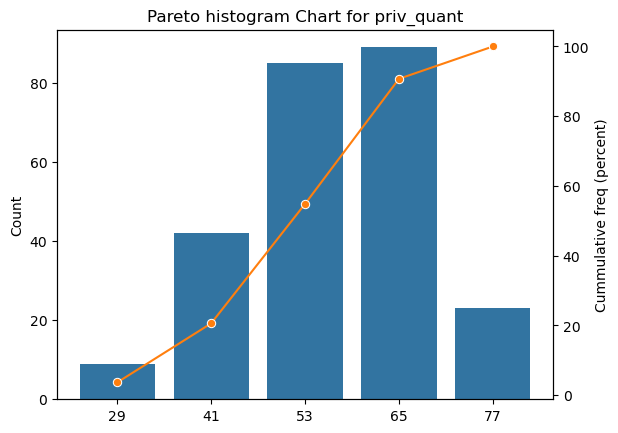

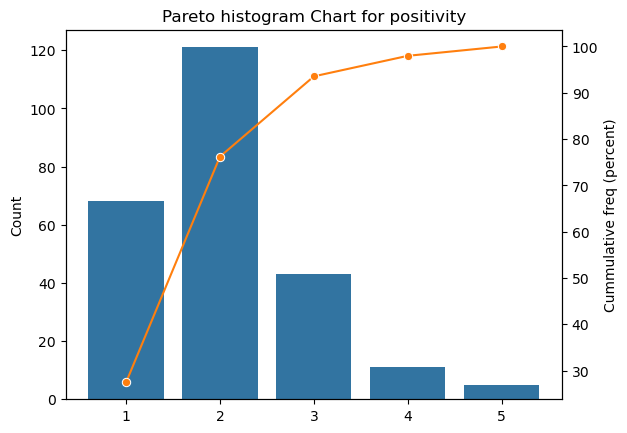

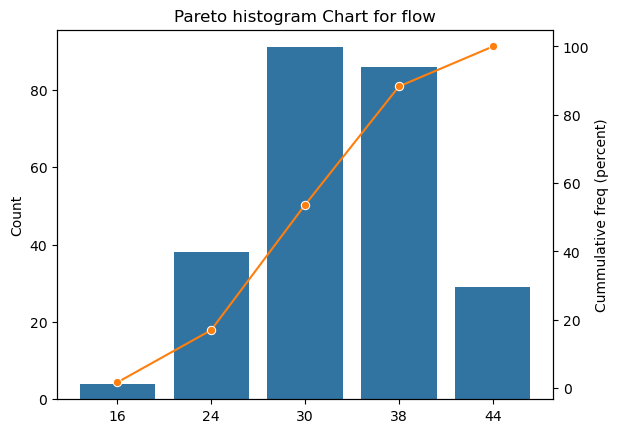

In [33]:
for i in numerical_cols:
    hist_data=msds_cum_histogram(df[i])
    msds_plot_histogram_pareto(hist_data, i)

<Axes: >

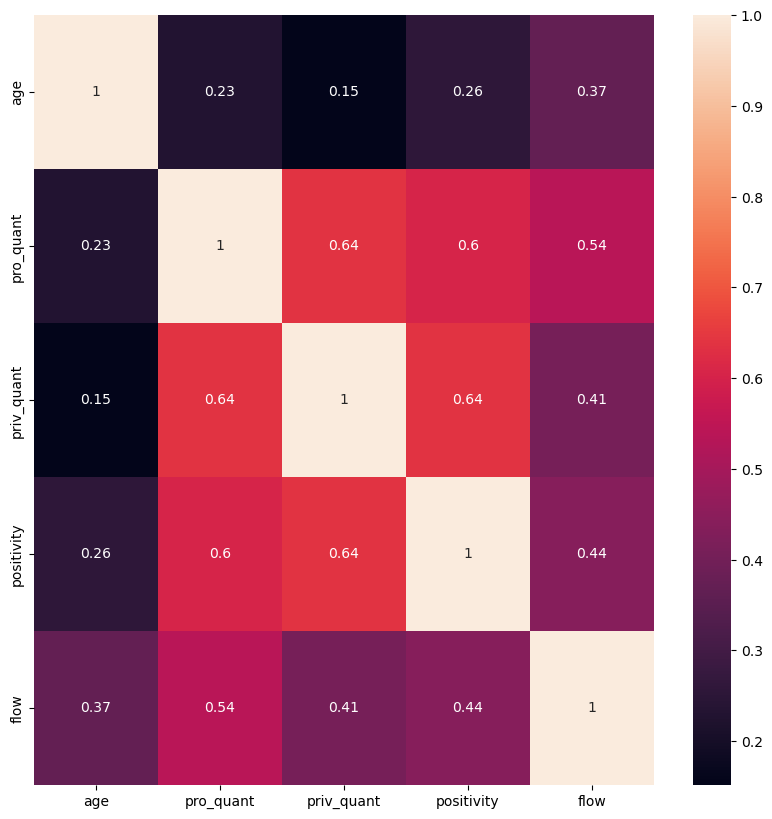

In [82]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df[numerical_cols].corr(), annot=True)